In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [18]:
whole_data = pd.read_csv("train_and_test2.csv")
data = whole_data.sample(frac=0.7, random_state=42)
data.reset_index(drop=True, inplace=True)
data.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1149,28.0,8.050,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,1050,42.0,26.550,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
2,983,28.0,7.775,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
3,809,39.0,13.000,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2.0,0,0,0
4,1196,28.0,7.750,1,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
data.dropna(inplace=True)
data=data[["Passengerid","Age","Fare","Sex"]]

In [20]:
data.shape

(915, 4)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  915 non-null    int64  
 1   Age          915 non-null    float64
 2   Fare         915 non-null    float64
 3   Sex          915 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 35.7 KB


In [22]:
data.describe()

,Passengerid,Age,Fare,Sex
count,915.000000,915.000000,915.000000,915.000000
mean,646.933333,29.440536,34.502272,0.356284
std,377.072100,13.158847,55.032449,0.479162
min,1.000000,0.170000,0.000000,0.000000
25%,323.500000,22.000000,7.895800,0.000000
50%,631.000000,28.000000,14.500000,0.000000
75%,976.000000,35.000000,31.387500,1.000000
max,1308.000000,80.000000,512.329200,1.000000


In [23]:
label_data = data.copy()
label_encoder = LabelEncoder()
object_cols = [ "Age", "Fare","Sex"]
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Passengerid,Age,Fare,Sex
0,1149,42,46,0
1,1050,63,138,0
2,983,42,32,0
3,809,59,79,0
4,1196,42,31,1


<Axes: >

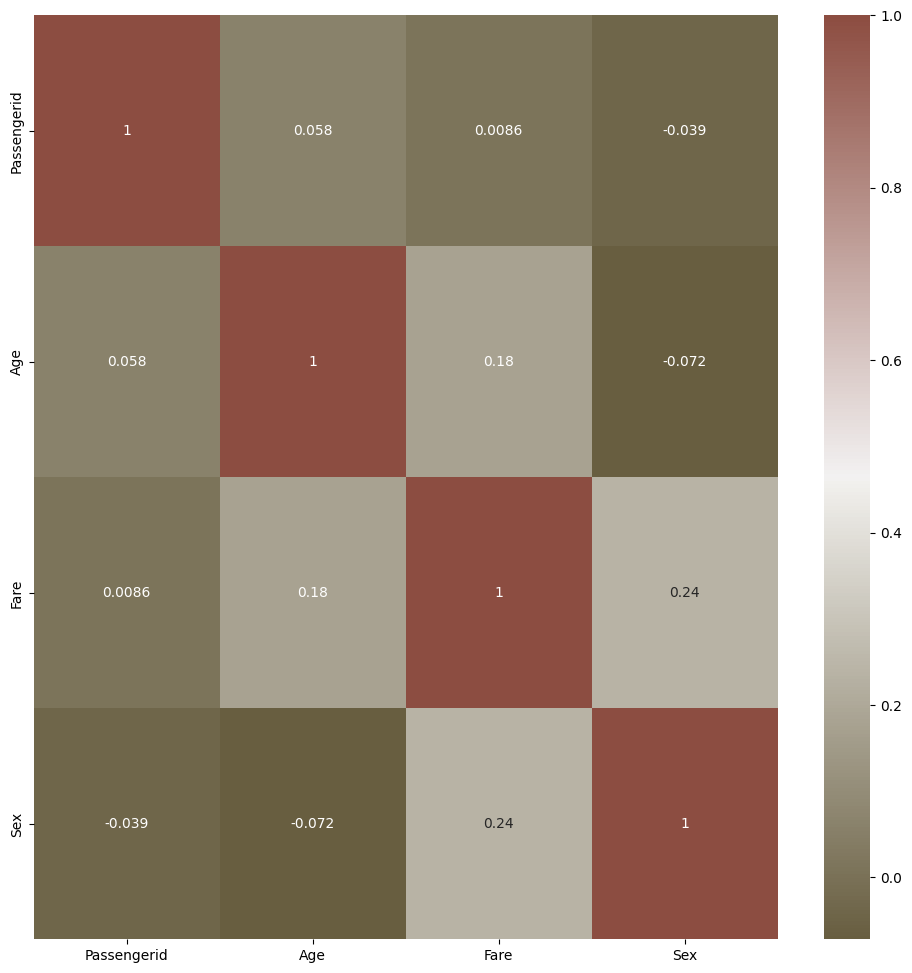

In [24]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [25]:
X= label_data.drop(["Fare"],axis =1)
y= label_data["Fare"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [26]:
pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor())


In [27]:
param_distributions = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__bootstrap': [True, False]
}

In [28]:
random_search = RandomizedSearchCV(pipeline_rf, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)


In [29]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [30]:
best_params_rf = random_search.best_params_
best_model_rf = random_search.best_estimator_

In [31]:
rf_pred = best_model_rf.predict(X_test)

In [32]:
metrics.mean_squared_error(y_test, rf_pred)


4718.860621145981

In [33]:
param_distributions = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__max_depth': [3, 4, 5],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__min_child_weight': [1, 3, 5],
    'xgbregressor__gamma': [0, 0.1, 0.3],
    'xgbregressor__subsample': [0.6, 0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.6, 0.8, 1.0]
}

In [34]:
pipeline_xgb = make_pipeline(StandardScaler(), XGBRegressor())


In [35]:
random_search = RandomizedSearchCV(pipeline_xgb, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)


In [36]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=N...
                   param_distributions={'xgbregressor__colsample_bytree': [0.6,
                                                                           0.8,
                                                                           1.0],
                                        'xgbregressor__gamma': [0, 0.1, 0.3],
                                        'xgbregressor__learning_rate': [0.01,
                                                                        0.05,
                                                                        0.1],
                                        'xgbregressor__max_depth': [3, 4, 5],
                                        'xgbregressor__min_child_weight': [1, 3,
                                                                           5],
                                        'xgbregressor__n_estimators': [100, 200,
                                                                       300],
                                        'xgbregressor__subsample': [0.6, 0.8,
                                                                    1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [37]:
best_params_xgb = random_search.best_params_
best_model_xgb = random_search.best_estimator_

In [38]:
xgb_pred = best_model_xgb.predict(X_test)


In [39]:
metrics.mean_squared_error(y_test, xgb_pred)


4430.771476147642

In [40]:
print("R^2:",metrics.r2_score(y_test, xgb_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, xgb_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, xgb_pred))
print("MSE:",metrics.mean_squared_error(y_test, xgb_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

R^2: 0.12473763975686847
Adjusted R^2: 0.11306747495362668
MAE: 56.31268300552035
MSE: 4430.771476147642
RMSE: 66.5640404133316
